In [5]:
import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd
from sklearn.cluster import KMeans
from scipy.stats import ranksums
import math

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)


In [3]:
center = np.loadtxt("BALL-large-center.txt")

In [4]:
list_negative = ["119",
"122",
"130",
"131",
"132",
"136",
"141",
"142",
"143",
"145",
"146",
"148",
"149",
"150",
"152",
"153",
"154",
"156",
"157",
"158",
"159",
"160",
"161",
"162",
"164",
"168",
"172"]

In [5]:
len(list_negative)

27

In [6]:
FDR_cluster = [71,87,18,66,16,59,69]

In [7]:
negative_output = []

In [8]:
for a in list_negative:

    data = pd.read_csv("Testing/testing/"+a+".LMD.txt",sep = "\t")
    #data = data.to_numpy()

    #train kmeans with new data
    data = data.to_numpy()
    kmeans = KMeans(n_clusters=100,init=center, random_state=0, max_iter=2)
    kmeans.fit(data)
    label = kmeans.labels_
    L = label.shape
    
    #record the number of cells in each clusters
    (unique, counts) = np.unique(label, return_counts=True)
    frequencies = np.asarray((unique, counts)).T

    #calculate tumor burden
    s = 0
    for c in FDR_cluster:
        s = frequencies[c][1]+s
    negative_output.append(s/L)

In [9]:
part_one = [float(i) for i in negative_output]

In [10]:
part_one

[0.037141,
 0.000939,
 0.003407,
 0.006968,
 0.0006916288144377039,
 0.001515,
 0.001278,
 0.004305,
 0.009798,
 0.004036,
 0.009646088186692344,
 0.001518,
 0.006563,
 0.017250307231575054,
 0.000999,
 0.001026,
 0.001048,
 0.000667397681111142,
 0.012463,
 0.013019,
 0.002766,
 0.003602,
 0.009445386292080407,
 0.026501,
 0.003231,
 0.001091,
 0.001427]

In [19]:
new_cols = []
rng = range(0, 100)
#new_cols = ['Cluster'] + [str(i) for i in rng]
for i in rng:
    new_cols.append('Cluster'+str(i))
#new_cols

In [20]:
healthy = pd.read_csv("master_healthy.csv", names = new_cols)

In [21]:
healthy

,Cluster0,Cluster1,Cluster2,Cluster3,Cluster4,Cluster5,Cluster6,Cluster7,Cluster8,Cluster9,...,Cluster90,Cluster91,Cluster92,Cluster93,Cluster94,Cluster95,Cluster96,Cluster97,Cluster98,Cluster99
0,0.007403,0.027707,0.003213,0.000779,0.004893,0.000026,0.019087,0.000060,0.000913,0.000005,...,0.000043,0.013867,0.013152,0.007904,0.000741,0.004645,0.004223,0.002133,0.011792,0.006839
1,0.002486,0.000001,0.016620,0.000004,0.016972,0.000001,0.054172,0.000001,0.002017,0.000001,...,0.001169,0.000072,0.010794,0.016258,0.000058,0.000848,0.000904,0.005108,0.011631,0.034544
2,0.006371,0.000089,0.020986,0.000117,0.032725,0.000123,0.038552,0.000008,0.000695,0.000038,...,0.001536,0.000295,0.009223,0.007752,0.000123,0.005155,0.000448,0.003085,0.020219,0.024042
3,0.004487,0.000968,0.099039,0.000001,0.007165,0.000381,0.051592,0.000001,0.001188,0.000002,...,0.000105,0.000296,0.008931,0.016847,0.000011,0.001336,0.000989,0.002475,0.015053,0.013974
4,0.000925,0.000265,0.009858,0.000171,0.034954,0.000007,0.039329,0.000123,0.003711,0.000012,...,0.000012,0.000748,0.018414,0.004334,0.000874,0.002718,0.001339,0.003075,0.049650,0.011915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,0.001018,0.000092,0.019425,0.000017,0.006154,0.000003,0.115203,0.000097,0.001858,0.000470,...,0.000042,0.000041,0.012850,0.006778,0.000353,0.000096,0.000556,0.000712,0.006824,0.007346
127,0.009608,0.000250,0.010230,0.000454,0.042741,0.000001,0.026159,0.000003,0.002907,0.000368,...,0.000083,0.004746,0.044794,0.003115,0.001733,0.004418,0.001507,0.005267,0.026511,0.019458
128,0.017624,0.000994,0.008338,0.000018,0.019832,0.000033,0.042186,0.000302,0.000879,0.001624,...,0.000267,0.000451,0.011994,0.020639,0.000239,0.009419,0.002316,0.012278,0.014611,0.025332
129,0.000987,0.000003,0.058171,0.000091,0.062476,0.000009,0.041516,0.000031,0.000385,0.000053,...,0.000221,0.000433,0.007833,0.001822,0.000018,0.002168,0.000612,0.000878,0.019768,0.011334


In [22]:
healthy_proportion = [0.0187664813217343,
0.0127307555198943,
0.111031936359559,
0.000827506190924695,
0.0923298574703694,
0.00102642243703099,
0.15085544375281,
0.0018654015980705,
0.0107394655752589,
0.000842555170095735,
0.0668095179868733,
0.0329830022018622,
0.0069476113520342,
0.042101800113414,
0.0327702027451507,
0.000913344077865108,
0.00341492396722235,
0.0202066453592216,
0.0028762407056544,
0.0778566893111877,
0.000527134714724283,
0.00114524461469388,
0.164944966244911,
0.0105133981949442,
0.0251171075621934,
0.000780726355405014,
0.00371355074025256,
0.171028795847402,
0.00493715929009136,
0.00104301086655516,
0.00121854866911758,
0.0155931798239371,
0.0339701111876648,
0.0297479588081896,
0.0412121428721105,
0.0678473225594139,
0.00616924995560409,
0.00451839951837417,
0.0786480410491969,
0.00959323364833295,
0.000689985442049697,
0.00217128143791991,
0.0298402807375224,
0.0046929299812867,
0.00392353612827476,
0.063560167904218,
0.0109872276837636,
0.0683503484299809,
0.00496523763028976,
0.0321823754108795,
0.000954409374030392,
0.0555300282518289,
0.025767668824392,
0.00830183789700523,
0.00684964616423387,
0.11366418122091,
0.0549092336529157,
0.0814681379129514,
0.243288842553669,
0.00536762264118255,
0.010004590733457,
0.00690102028695233,
0.0017457915012642,
0.0441315873131877,
0.064065204774205,
0.214753426727775,
0.0357321247015252,
0.00105759053006974,
0.00785387977974818,
0.00639932908212845,
0.00077440868623516,
0.00694788365559704,
0.000868693875389879,
0.000940553675909967,
0.0361501769522294,
0.00248664324194341,
0.0294797804563457,
0.149082412321799,
0.00177922144450148,
0.0177044036972588,
0.00446715528775185,
0.0606423932826798,
0.00630486127818965,
0.00306843368606661,
0.00948496650479067,
0.040229834504598,
0.00531572592109844,
0.0134229662803926,
0.00621265935793075,
0.110898318124095,
0.00842183980069124,
0.00882802331818782,
0.0423397226589633,
0.0303905953045263,
0.00594926988413769,
0.00723732922962805,
0.0076427097894594,
0.00924986952254436,
0.0971597522434005,
0.0310341459875951]

In [41]:
ranksums(healthy["Cluster6"],np.array([0.006]))

RanksumsResult(statistic=-0.0656098679063425, pvalue=0.9476884325904459)

In [12]:
positive_list = ["208",
"67",
"103",
"58",
"75",
"185",
"211",
"68",
"133",
"108",
"72",
"218",
"189",
"183",
"173",
"76",
"53",
"29",
"91",
"20",
"184",
"71",
"43",
"78",
"166",
"40",
"193",
"74",                
"137",
"93",
"223",
"134",
"62",
"94",
"92",
"219",
"165",
"5",
"155",
"4",
"2",
"100"]

In [13]:
len(positive_list)

42

In [1]:
positive_output = []

In [2]:
for a in positive_list:

    data = pd.read_csv("dataset/"+a+".LMD.txt",sep = "\t")
    #data = data.to_numpy()

    #train kmeans with new data
    data = data.to_numpy()
    kmeans = KMeans(n_clusters=100,init=center, random_state=0, max_iter=2)
    kmeans.fit(data)
    label = kmeans.labels_
    L = label.shape
    #print(L[0])
    #record the number of cells in each clusters
    (unique, counts) = np.unique(label, return_counts=True)
    frequencies = np.asarray((unique, counts)).T
    #print(frequencies)
    
    #calculate total cell number
    freqlist = np.empty([1,100])
    s = 0
    for i in range(0,100):
        if(frequencies[i][0] in FDR_cluster):
            s = frequencies[i][1]+s 
        elif(frequencies[i][1]/L[0] > healthy_proportion[i]):
            s = frequencies[i][1]+s    
    positive_output.append(s/L[0])

NameError: name 'positive_list' is not defined

In [24]:
positive_output

[0.002101,
 0.03525417991010137,
 0.4805016343139217,
 0.153564,
 0.114779,
 0.270741,
 0.101313,
 0.300933,
 0.39670552291540734,
 0.320177,
 0.2911393479085632,
 0.340764,
 0.535083,
 0.426331,
 0.319752,
 0.522513,
 0.3062154201877288,
 0.344312,
 0.42039,
 0.8240064075112328,
 0.7069130375009075,
 0.815163,
 0.664275,
 0.7514311627880775,
 0.5864907443875541,
 0.815257,
 0.788086,
 0.870776,
 0.877405,
 0.7703482228253536,
 0.849248,
 0.815952,
 0.06966397503851614,
 0.880388,
 0.778833,
 0.862007,
 0.018926,
 0.473312,
 0.19684621301285377,
 0.22078929631594799,
 0.911308,
 0.8928895225368834]

In [25]:
len(positive_output)

42

In [1]:
doctor = [0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0.0001,
0.0014,
0.0018,
0.0022,
0.0024,
0.0039,
0.0067,
0.0545,
0.0559,
0.1033,
0.1348,
0.1508,
0.2282,
0.2985,
0.3048,
0.3096,
0.4713,
0.4764,
0.4774,
0.4895,
0.4917,
0.4923,
0.5134,
0.5682,
0.73,
0.7725,
0.7821,
0.7852,
0.8139,
0.852,
0.8619,
0.8852,
0.9039,
0.9046,
0.9192,
0.9412,
0.9533,
0.9534,
0.9541,
0.9712,
0.9714,
0.982,
0.0177,
0.0313,
0.0401,
0.1,
0.9581,
0.988]

In [2]:
len(doctor)

69

In [9]:
color_label = []
for a in doctor:
    if a < 0.0001:
        color_label.append('k')
    else:
        color_label.append('r') 

In [3]:
tumor_burden = [0.037141,
 0.000939,
 0.003407,
 0.006968,
 0.0006916288144377039,
 0.001515,
 0.001278,
 0.004305,
 0.009798,
 0.004036,
 0.009646088186692344,
 0.001518,
 0.006563,
 0.017250307231575054,
 0.000999,
 0.001026,
 0.001048,
 0.000667397681111142,
 0.012463,
 0.013019,
 0.002766,
 0.003602,
 0.009445386292080407,
 0.026501,
 0.003231,
 0.001091,
 0.001427,
0.002101,
 0.03525417991010137,
 0.4805016343139217,
 0.153564,
 0.114779,
 0.270741,
 0.101313,
 0.300933,
 0.39670552291540734,
 0.320177,
 0.2911393479085632,
 0.340764,
 0.535083,
 0.426331,
 0.319752,
 0.522513,
 0.3062154201877288,
 0.344312,
 0.42039,
 0.8240064075112328,
 0.7069130375009075,
 0.815163,
 0.664275,
 0.7514311627880775,
 0.5864907443875541,
 0.815257,
 0.788086,
 0.870776,
 0.877405,
 0.7703482228253536,
 0.849248,
 0.815952,
 0.06966397503851614,
 0.880388,
 0.778833,
 0.862007,
 0.018926,
 0.473312,
 0.19684621301285377,
 0.22078929631594799,
 0.911308,
 0.8928895225368834]

In [6]:
np.corrcoef(doctor, tumor_burden)

array([[1.        , 0.91579275],
       [0.91579275, 1.        ]])

In [16]:
xline = [0,1]
yline = [0,1]
yvertical = [0.0001, 0.0001]
xvertical = [0, 1]

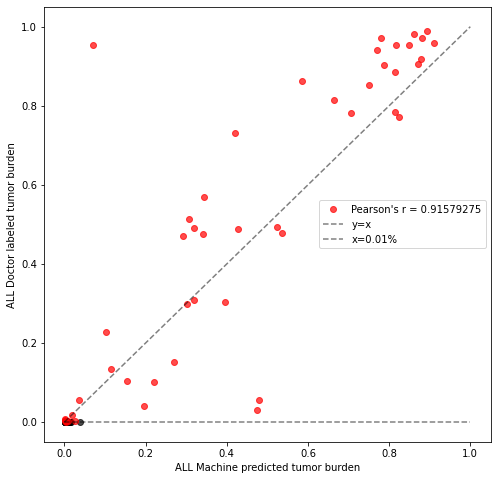

In [17]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))

for x,y, color in zip(tumor_burden, doctor, color_label):
    ax.plot(x,y,'o',color=color, alpha=0.7, picker=True, label = "Pearson's r = 0.91579275")

ax.plot(xline, yline, '--', label='y=x', alpha=0.5, color = 'k')
ax.plot(xvertical, yvertical, '--', label='x=0.01%', alpha=0.5, color = 'k')
plt.xlabel("ALL Machine predicted tumor burden")
plt.ylabel("ALL Doctor labeled tumor burden")

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
#ax.set_xlim(0, 1)
#ax.set_ylim(0, 1)
plt.show()